<a href="https://colab.research.google.com/github/YongjaeKwon0629/07_04/blob/main/Python_Practice_07_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -qq install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
# 1. 나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

✅ 경로 탐색 성공! 시각화 시작


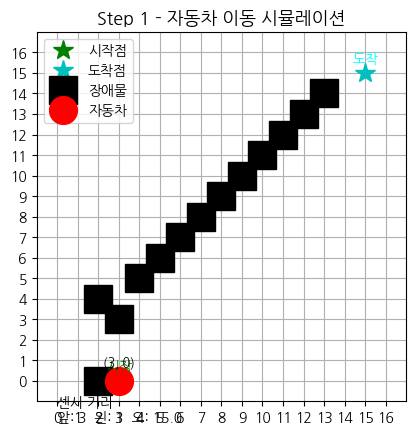

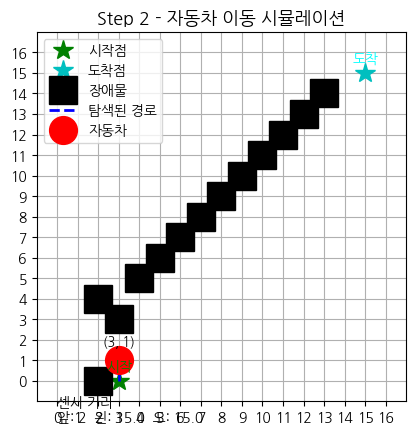

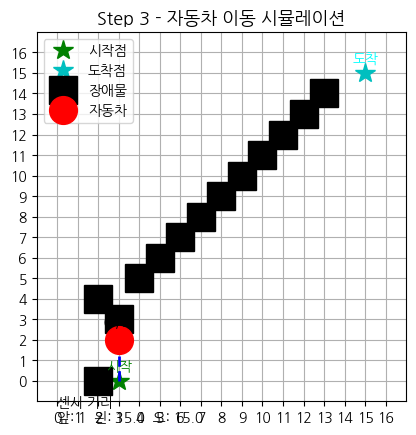

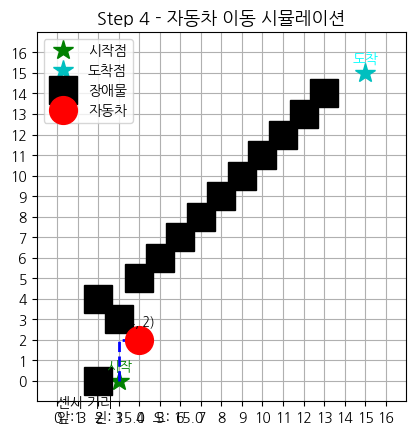

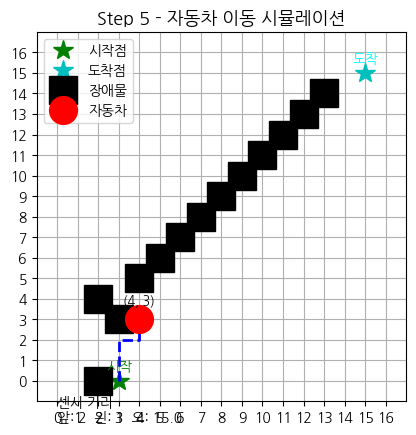

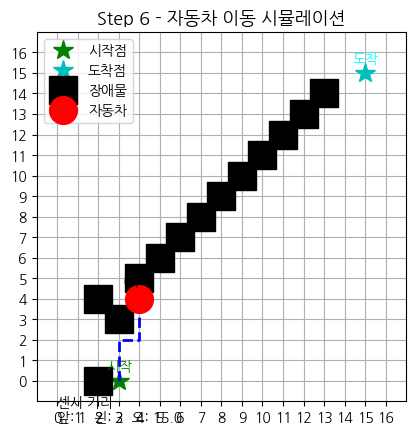

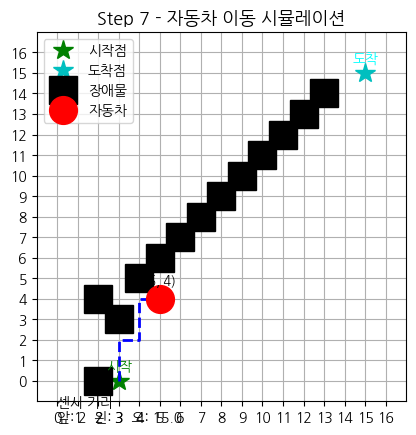

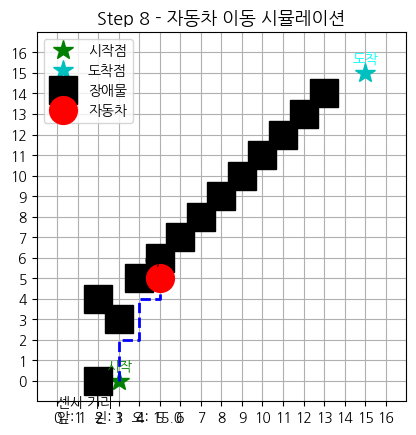

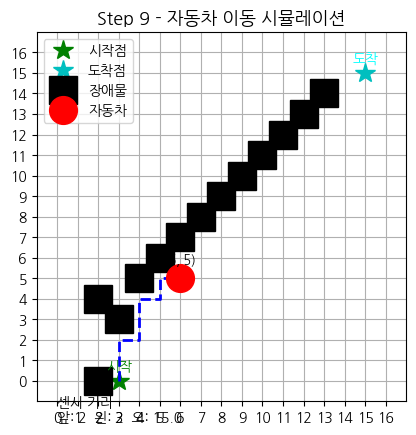

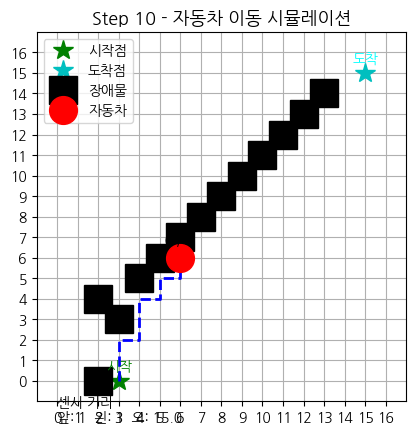

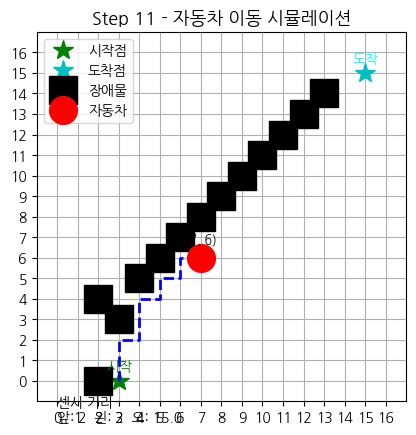

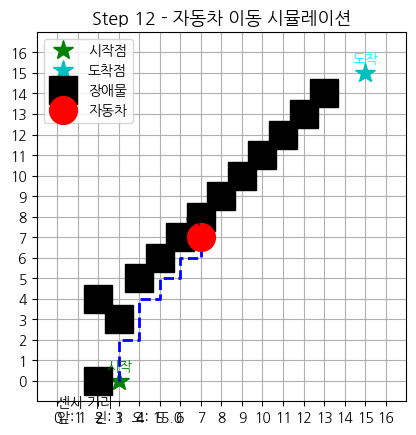

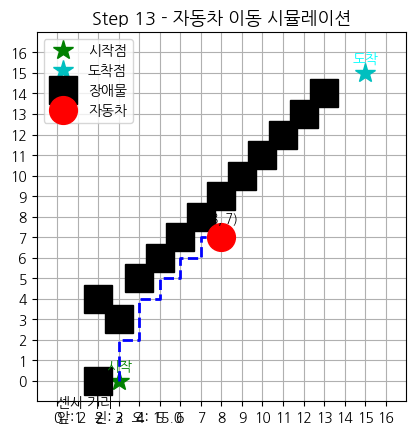

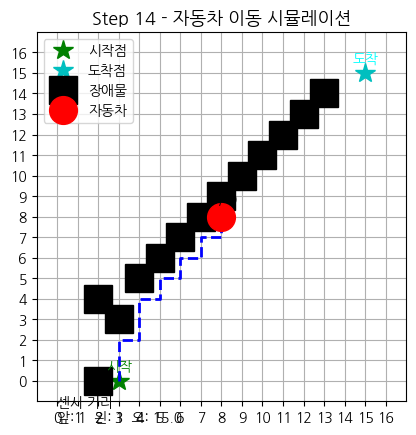

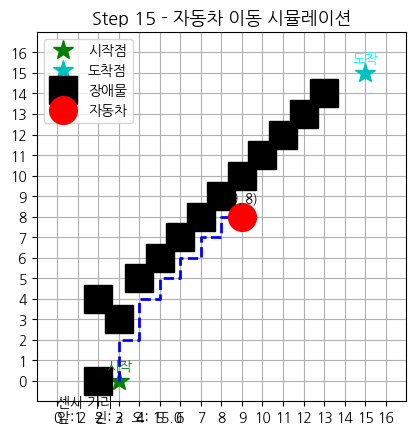

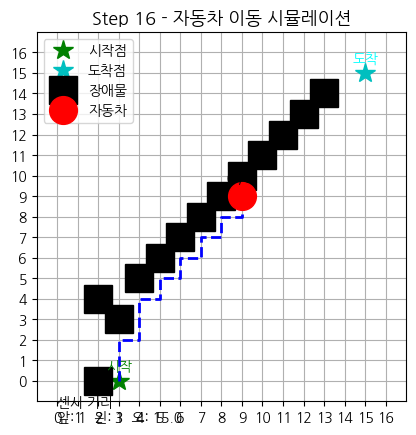

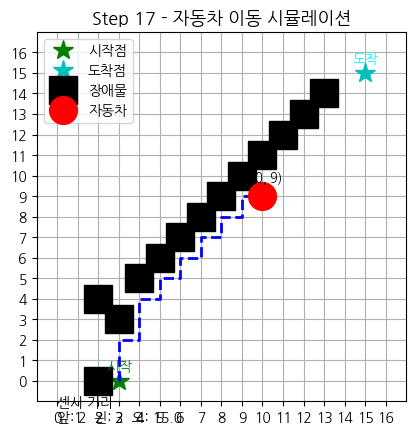

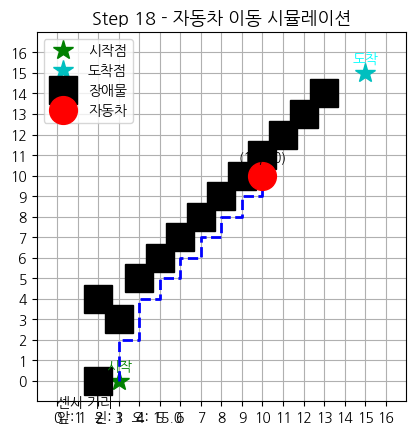

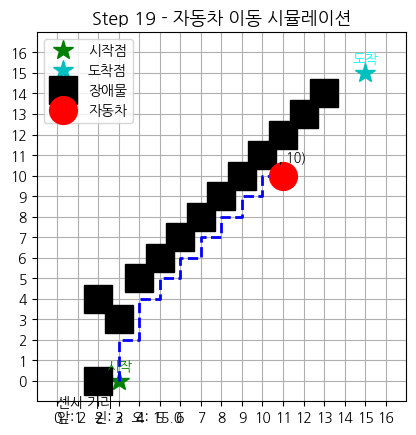

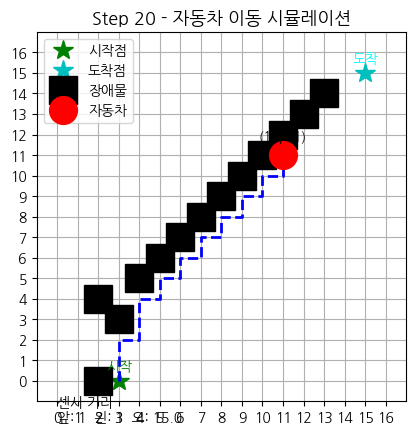

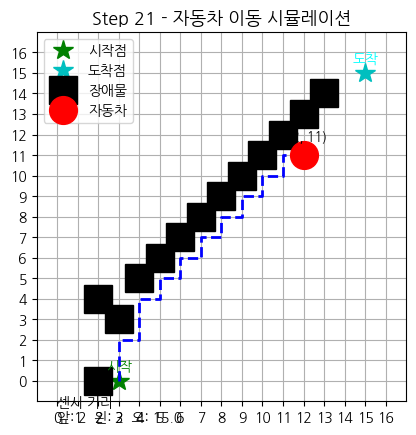

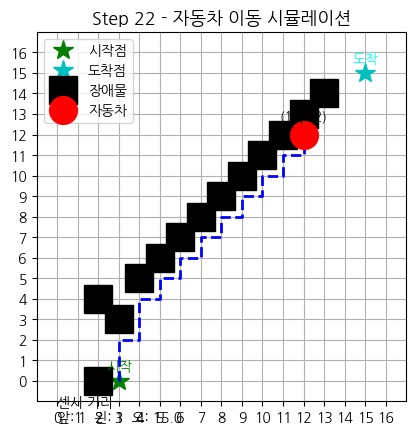

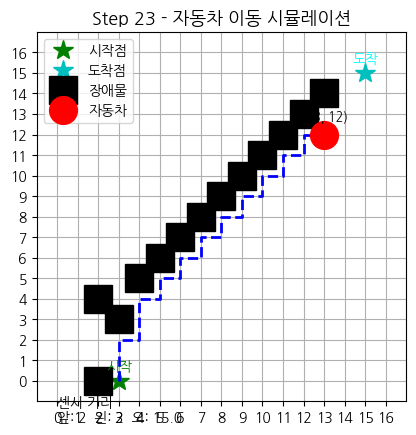

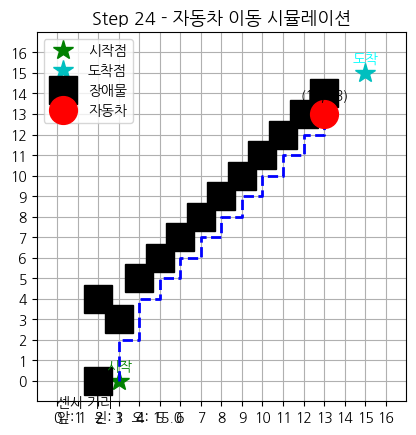

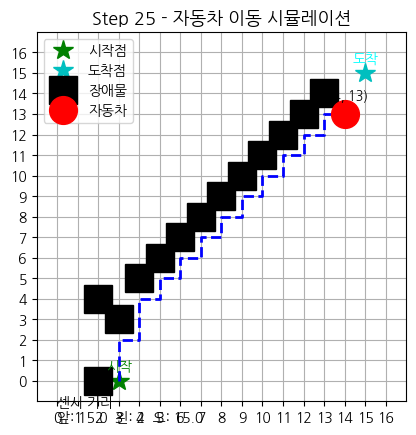

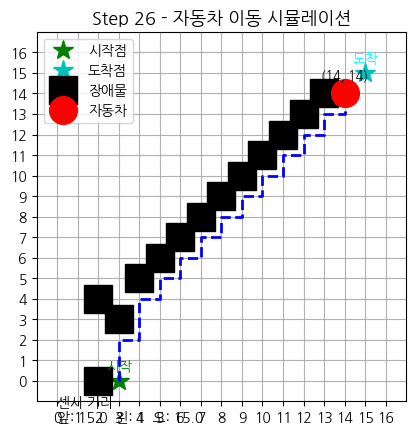

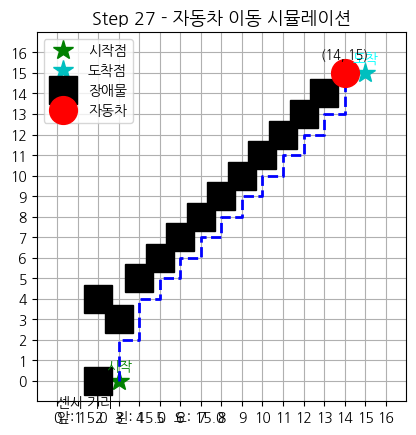

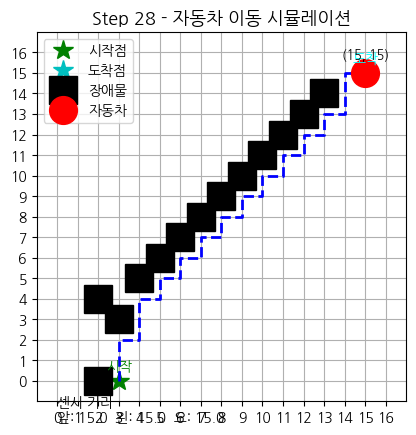

In [3]:
# ✅ 필요한 모듈 import
import heapq
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# ✅ 한글 폰트 적용 (Colab에서 실행 시, 맨 처음 한 번만 폰트 설치 후 런타임 재시작 필요)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
mpl.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# ✅ [1] 함수 선언
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# ✅ [2] 경로 탐색
def a_star_search(start, goal, obstacles, grid_size):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    obstacles_set = set(obstacles)

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            neighbor = (current[0]+dx, current[1]+dy)
            if not (0 <= neighbor[0] <= grid_size and 0 <= neighbor[1] <= grid_size):
                continue
            if neighbor in obstacles_set:
                continue
            tentative_g = g_score[current] + 1
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None

# ✅ [2-1] 경로 재구성 (이전과 동일)
def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

# ✅ [3] 시각화 함수
# <<< [수정] 시작점과 도착점을 인자로 받도록 수정
def visualize_path(path, obstacles, start, goal, grid_size=16, step_delay=0.5):
    plt.ion()
    for step, pos in enumerate(path):
        plt.clf()
        plt.title(f"Step {step + 1} - 자동차 이동 시뮬레이션", fontsize=13)
        plt.xlim(-1, grid_size+1)
        plt.ylim(-1, grid_size+1)
        plt.xticks(range(grid_size + 1))
        plt.yticks(range(grid_size + 1))
        plt.grid(True)

        # <<< [추가] 시작점 표시
        plt.plot(start[0], start[1], 'g*', markersize=15, label='시작점')
        plt.text(start[0], start[1] + 0.5, "시작", fontsize=10, color='green', ha='center')

        # <<< [추가] 도착점 표시
        plt.plot(goal[0], goal[1], 'c*', markersize=15, label='도착점')
        plt.text(goal[0], goal[1] + 0.5, "도착", fontsize=10, color='cyan', ha='center')

        # 장애물 표시
        for i, (ox, oy) in enumerate(obstacles):
            # 범례에 '장애물'이 한 번만 표시되도록 설정
            label = '장애물' if i == 0 else ""
            plt.plot(ox, oy, 'ks', markersize=20, label=label)
            # plt.text(ox-0.4, oy+0.4, "장애물", fontsize=8) # 텍스트가 많아지면 복잡해져서 주석 처리

        # 자동차 경로
        if step > 0:
            xs, ys = zip(*path[:step+1])
            # <<< [수정] 경로에 라벨 추가 (범례 표시용)
            # 범례에 '탐색된 경로'가 한 번만 표시되도록 설정
            label = '탐색된 경로' if step == 1 else ""
            plt.plot(xs, ys, 'b--', linewidth=2, label=label)

        # 자동차 위치
        plt.plot(pos[0], pos[1], 'ro', markersize=20, label='자동차')
        plt.text(pos[0], pos[1] + 0.7, f"({pos[0]}, {pos[1]})", fontsize=9, ha='center')

        # 센서 거리 출력 시뮬레이션
        sensors = {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
        for ox, oy in obstacles:
            if ox == pos[0] and oy > pos[1]:
                sensors['앞'] = min(sensors['앞'], oy - pos[1])
            if oy == pos[1] and ox < pos[0]:
                sensors['왼쪽'] = min(sensors['왼쪽'], pos[0] - ox)
            if oy == pos[1] and ox > pos[0]:
                sensors['오른쪽'] = min(sensors['오른쪽'], ox - x)
        label = f"센서 거리\n앞: {sensors['앞']}  왼: {sensors['왼쪽']}  오: {sensors['오른쪽']}"
        plt.text(0, -2, label, fontsize=10) # y 위치 살짝 조정

        plt.gca().set_aspect('equal', adjustable='box')

        # <<< [추가] 범례 표시
        plt.legend()

        plt.pause(step_delay)

    plt.ioff()
    plt.show()

# ✅ [4] 실행
start = (3, 0)
goal = (15, 15)
obstacles = {
    (4, 5), (3, 3), (2, 0), (2, 4),
    (5, 6), (6, 7), (7, 8), (8, 9),
    (9, 10), (10, 11), (11, 12), (12, 13), (13, 14)
}

path = a_star_search(start, goal, obstacles, grid_size=16)
if path:
    print("✅ 경로 탐색 성공! 시각화 시작")
    # <<< [수정] 변경된 함수에 맞게 start, goal 인자 전달
    visualize_path(path, obstacles, start, goal)
else:
    print("❌ 경로를 찾을 수 없습니다.")